# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Pandas](#Section-1)
- [Section 2 &ndash; Data Wrangling](#Section-2)
- [Section 3 &ndash; Data Visualization](#Section-3)

--- 

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [2]:
import pandas as pd
Taxi = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv', nrows=5)
Taxi

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1,0.5,0.50,0.00,0.3,15.30,2.5


#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

In [3]:
Taxi.shape

(5, 18)

#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [8]:
Taxi.fare_amount.mean()


14.6

#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [15]:
isolate = Taxi.loc[Taxi['trip_distance'].idxmax()]
selected_columns = isolate[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']]
print(selected_columns)

fare_amount     29.5
tip_amount      7.98
tolls_amount    6.12
total_amount    47.9
Name: 0, dtype: object


---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [4]:
import pandas as pd
meteorite = pd.read_csv('../data/Meteorite_Landings.csv')
meteorite.drop(columns=['reclat', 'reclong', 'GeoLocation'], inplace=True)


meteorite = meteorite.rename(
    columns={
        'mass (g)': 'mass'
    }
)
meteorite = meteorite.sort_values(['mass'], ascending=[False])
meteorite


,name,id,nametype,recclass,mass,fall,year
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM
...,...,...,...,...,...,...,...
38282,Wei-hui-fu (a),24231,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM
38283,Wei-hui-fu (b),24232,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM
38285,Weiyuan,24233,Valid,Mesosiderite,NaN,Found,01/01/1978 12:00:00 AM
41472,Yamato 792768,28117,Valid,CM2,NaN,Found,01/01/1979 12:00:00 AM


#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [41]:
#meteorite['year'] = meteorite['year'].astype(str)
#meteorite['year'] = meteorite['year'].str.slice(6,10)
#meteorite['year'] = pd.to_numeric(meteorite['year'])
#meteorite['year'] = meteorite['year'].str.extract(r'(\d{4})').astype(float)
#meteorite = meteorite.set_index('id') (FOR SOME REASON, AFTER EXECUTING THIS ARGUMENT, IT DOENST LIKE KEEPING IT IN (GIVES ERROR STATING ID IS NOT A COLUMN?))
meteorite = meteorite.sort_index()

#meteorite.loc[10036:10041]
meteorite = meteorite.reset_index()
meteorite.head()

,index,name,id,nametype,recclass,mass,fall,year
0,0,Aachen,1,Valid,L5,21.0,Fell,1880.0
1,1,Aarhus,2,Valid,H6,720.0,Fell,1951.0
2,2,Abee,6,Valid,EH4,107000.0,Fell,1952.0
3,3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0
4,4,Achiras,370,Valid,L6,780.0,Fell,1902.0


#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [12]:
#meteorite['year'] = meteorite['year'].str.extract(r'(\d{4})').astype(float)

meto_melted = meteorite[(meteorite['year'] >= 2005.0) & (meteorite['year'] <= 2009.0)]
meto_grouped = meto_melted.groupby(['year','fall'])['mass'].sum().reset_index()
meto_pivot = meto_grouped.pivot(
    index='year',
    columns='fall',
    values ='mass'
)
meto_pivot

fall,Fell,Found
year,,
2005.0,NaN,1878063.380
2006.0,44223.00,5074301.850
2007.0,175558.41,546395.822
2008.0,278473.00,1169404.648
2009.0,15546.55,2263168.770


#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [18]:
grouped = meteorite.groupby('fall')
compare= grouped['mass'].describe()
compare

,count,mean,std,min,25%,50%,75%,max
fall,,,,,,,,
Fell,1075.0,47070.715023,717067.125826,0.1,686.00,2800.0,10450.0,23000000.0
Found,44510.0,12461.922983,571105.752311,0.0,6.94,30.5,178.0,60000000.0


#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [27]:
import pandas as pd
taxi = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv', parse_dates=['tpep_dropoff_datetime']) 
taxi.set_index('tpep_dropoff_datetime', inplace=True)

hourly = taxi.resample('H').agg({
    'trip_distance': 'sum',
    'fare_amount': 'sum',
    'tolls_amount': 'sum',
    'tip_amount': 'sum'
    
})
hourly

top_five=hourly.nlargest(5,'tip_amount')
top_five

,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 16:00:00,10676.95,67797.76,699.04,12228.64
2019-10-23 17:00:00,16052.83,70131.91,4044.04,12044.03
2019-10-23 18:00:00,3104.56,11565.56,1454.67,1907.64
2019-10-23 15:00:00,14.34,213.50,0.00,51.75
2019-10-23 19:00:00,98.59,268.00,24.48,25.74


--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

<Axes: xlabel='year'>

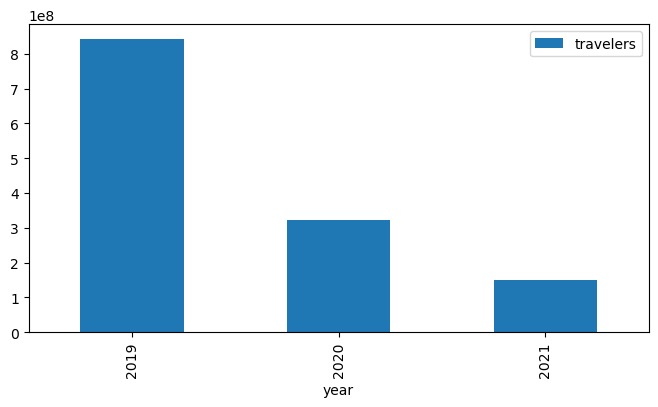

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
#read the csv file
tsa_melted = pd.read_csv('../data/tsa_melted_holiday_travel.csv')

#set year column as string (not numerical)
tsa_melted['year'] = tsa_melted['year'].astype(str)

#create a new table that groups the year rows together as one, and adds up all the traveleres for that year
#as_index= False means the grouped columns do not become the index (what its sorted by). Default is set to True
yearly = tsa_melted.groupby('year', as_index=False)['travelers'].sum()
yearly

ax =yearly.plot(kind='bar', x='year', y='travelers', rot=0, figsize=(8,4))

ax

#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

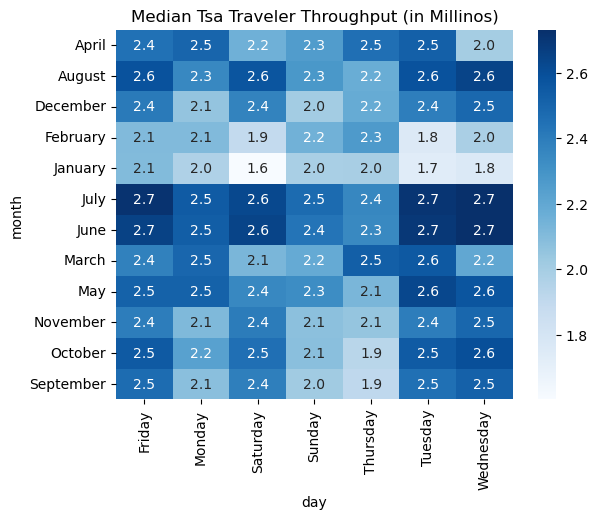

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tsa_melted = pd.read_csv('../data/tsa_melted_holiday_travel.csv')

tsa_melted['date']=pd.to_datetime(tsa_melted['date'])

tsa_melted['day']=tsa_melted['date'].dt.day_name()
tsa_melted['month']=tsa_melted['date'].dt.month_name()

data_2019=tsa_melted[tsa_melted['date'].dt.year == 2019]
    #.assign(month=lambda x: x.index.month)\
    #.pivot_table(index='month', columns='day', values='travelers', aggfunc='median')




#month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'Ocotber', 'November','December']
#day=order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#data_2019['month'] =pd.Categorical(data_2019['month'], categories=month_order, ordered=True)
#data_2019['day']=pd.Categorical(data_2019['day'], categories=day_order, ordered=True)

data = data_2019.pivot_table(index='month', columns='day', values='travelers', aggfunc='median')
data
ax = sns.heatmap(data=data / 1e6, cmap='Blues', annot=True, fmt='.1f')
_ = ax.set_title('Median Tsa Traveler Throughput (in Millinos)')

#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.

In [ ]:
-+